In [1]:
# 🚀 LINEAR REGRESSION IN PYTORCH
# ============================================
# GOAL: Learn the parameters of the line y = 2x + 3
# using synthetic noisy data and a linear model.
# ============================================

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

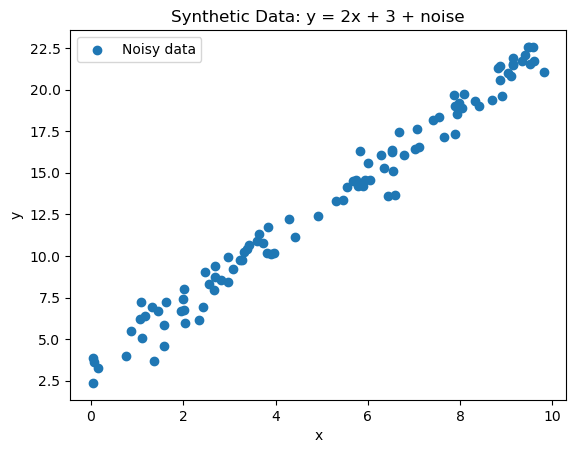

In [2]:
# STEP 1: GENERATE SYNTHETIC DATA

# True underlying relationship: y = 2x + 3
def true_function(x):
    return 2 * x + 3

# Generate random x values between 0 and 10
x = torch.rand(100, 1) * 10  # shape (100, 1)
y = true_function(x) + torch.randn_like(x)  # add Gaussian noise

# Plot the synthetic data
plt.scatter(x.numpy(), y.numpy(), label="Noisy data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Data: y = 2x + 3 + noise")
plt.legend()
plt.show()

In [3]:
# STEP 2: DEFINE A LINEAR MODEL

# Define a simple linear regression model: y = wx + b
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [4]:
# STEP 3: CHOOSE LOSS FUNCTION AND OPTIMIZER

# Mean squared error is standard for regression
loss_fn = nn.MSELoss()

# Stochastic Gradient Descent optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [5]:
# STEP 4: TRAINING LOOP

num_epochs = 200
loss_history = []

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss and print progress
    loss_history.append(loss.item())
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss = {loss.item():.4f}")

Epoch 20/200, Loss = 2.6873
Epoch 40/200, Loss = 2.3344
Epoch 60/200, Loss = 2.0431
Epoch 80/200, Loss = 1.8025
Epoch 100/200, Loss = 1.6039
Epoch 120/200, Loss = 1.4399
Epoch 140/200, Loss = 1.3045
Epoch 160/200, Loss = 1.1927
Epoch 180/200, Loss = 1.1004
Epoch 200/200, Loss = 1.0242


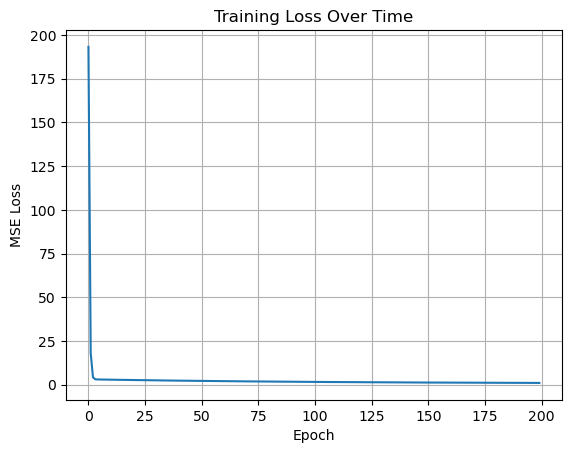

In [6]:
# STEP 5: PLOT TRAINING LOSS

plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Time")
plt.grid(True)
plt.show()

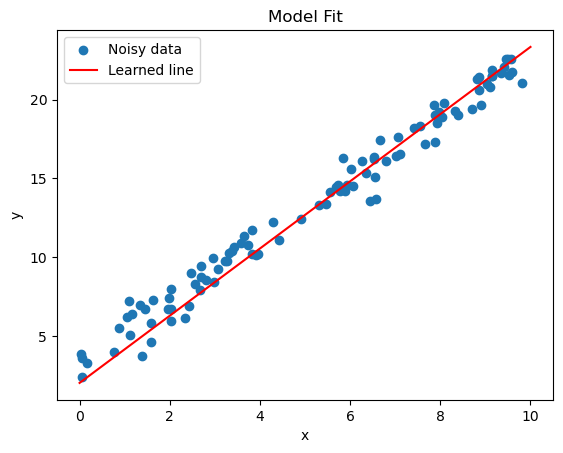

Learned parameters: w = 2.13, b = 2.02


In [7]:
# STEP 6: VISUALIZE THE LEARNED LINE

# Plot original data
plt.scatter(x.numpy(), y.numpy(), label="Noisy data")

# Plot learned model prediction
with torch.no_grad():
    x_line = torch.linspace(0, 10, 100).reshape(-1, 1)
    y_line = model(x_line)
    plt.plot(x_line.numpy(), y_line.numpy(), color='red', label="Learned line")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Fit")
plt.legend()
plt.show()

# Print learned parameters
w, b = model.linear.weight.item(), model.linear.bias.item()
print(f"Learned parameters: w = {w:.2f}, b = {b:.2f}")